In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [2]:
 import matplotlib.pyplot as plt # para dibujar

%matplotlib inline
from matplotlib import cm

plt.rcParams['figure.figsize'] = (16, 16)
plt.style.use('ggplot')

warnings.simplefilter('ignore')

In [3]:
# Read the excel file
df = pd.read_excel('Cabify_2010.xlsx')

In [4]:
# Number of rows
origina_len = len(df.index)
origina_len

23111

In [5]:
df.head(3).T

0  \
journey_id        23a1406fc6a11d866e3c82f22eed4d4c   
user_id           0e9af5bbf1edfe591b54ecdfd7e91e26   
driver_id         583949a89a9ee17d19e3ca4f137b6b4c   
taxi_id           b12f4f09c783e29fe0d0ea624530db56   
icon                                     executive   
start_type                                    asap   
start_at                       2010-11-16 16:44:52   
start_lat                                 -12.1398   
start_lon                                 -77.0236   
end_at                         2010-11-16 17:29:57   
end_lat                                   -12.0554   
end_lon                                   -77.0413   
end_state                                 drop off   
driver_start_lat                          -12.1083   
driver_start_lon                          -77.0273   
arrived_at                     2010-11-16 17:02:14   
currency                                       PEN   
price                                         3821   
price_distance                                3626   
price_duration                                 195   
distance                                     11331   
duration                                       234   
cost                                             0   
cost_distance                                    0   
cost_duration                                    0   
source                                      iPhone   
driver_score                                     5   
rider_score                                      5   

                                                 1  \
journey_id        dd2af4715d0dc16eded53afc0e243577   
user_id           a553c46e3a22fb9c326aeb3d72b3334e   
driver_id                                      NaN   
taxi_id                                        NaN   
icon                                     executive   
start_type                                    asap   
start_at                       2010-06-01 00:34:38   
start_lat                                 -12.1387   
start_lon                                 -76.9954   
end_at                         2010-06-01 00:37:39   
end_lat                                   -12.1247   
end_lon                                   -77.0289   
end_state                                not found   
driver_start_lat                               NaN   
driver_start_lon                               NaN   
arrived_at                                     NaT   
currency                                       PEN   
price                                            0   
price_distance                                 NaN   
price_duration                                 NaN   
distance                                         0   
duration                                         0   
cost                                             0   
cost_distance                                  NaN   
cost_duration                                  NaN   
source                                      iPhone   
driver_score                                   NaN   
rider_score                                    NaN   

                                                 2  
journey_id        dd91e131888064bf7df3ce08f3d4b4ad  
user_id           a553c46e3a22fb9c326aeb3d72b3334e  
driver_id                                      NaN  
taxi_id                                        NaN  
icon                                     executive  
start_type                                    asap  
start_at                       2010-05-31 05:01:24  
start_lat                                 -12.1245  
start_lon                                 -77.0278  
end_at                         2010-05-31 05:04:34  
end_lat                                   -12.1388  
end_lon                                   -76.9953  
end_state                                not found  
driver_start_lat                               NaN  
driver_start_lon                               NaN  
arrived_at                                     NaT  
currency      

In [6]:
# Analyze the unique values by column:
df.apply(lambda x: len(x.unique())) 

journey_id          23111
user_id              1390
driver_id             169
taxi_id               214
icon                    3
start_type              3
start_at            21724
start_lat           11761
start_lon            8494
end_at              22814
end_lat             12280
end_lon              9090
end_state               7
driver_start_lat    18476
driver_start_lon    18353
arrived_at          17707
currency                1
price                5457
price_distance       5779
price_duration       2677
distance             8393
duration             2959
cost                 4099
cost_distance        4626
cost_duration        2061
source                  6
driver_score            7
rider_score             7
dtype: int64

We see that the column "currency" only have one different value, it's not neccessary right now

In [7]:
df = df.drop(['currency'], axis=1)

In [8]:
#Let's go to check the type of values that we have:
df.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                  float64
start_lon                  float64
end_at              datetime64[ns]
end_lat                    float64
end_lon                    float64
end_state                   object
driver_start_lat           float64
driver_start_lon           float64
arrived_at          datetime64[ns]
price                      float64
price_distance             float64
price_duration             float64
distance                   float64
duration                   float64
cost                       float64
cost_distance              float64
cost_duration              float64
source                      object
driver_score               float64
rider_score                float64
dtype: object

- Most of them are numeric data.
- Some are data to identify the drives, the car and the journey.
- A little bit shows the date and time of the travel.

In [9]:
#Check the null values:
df.isnull().values.any()

True

In [10]:
# Check the coluns with more nan values
df.isnull().sum()

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
price                 398
price_distance       3170
price_duration       3170
distance              263
duration              263
cost                 1351
cost_distance        5073
cost_duration        5073
source                123
driver_score        15461
rider_score          7721
dtype: int64

In [11]:
#If almost the 25% of the values have null value, we delete that column:
null_values = list(df.isnull().sum())
placeholder = len(df.index)*0.25
delete_columns = []
delete_values = []

for column, value in zip(df.columns, null_values):
    if value >= placeholder:
        delete_columns.append(column)
        delete_values.append(value)
        df = df.drop([column], axis=1)
        
print(f'We have deleted the next columns: {delete_columns} that have {delete_values} of null values' )

We have deleted the next columns: ['driver_score', 'rider_score'] that have [15461, 7721] of null values


In [12]:
# Check again the columns after to appply the first filter to delete the columns with too much null values:
df.isnull().sum()

journey_id             0
user_id                0
driver_id           3385
taxi_id             3385
icon                   0
start_type             0
start_at               0
start_lat              0
start_lon              0
end_at               276
end_lat                0
end_lon                0
end_state             12
driver_start_lat    3490
driver_start_lon    3490
arrived_at          5395
price                398
price_distance      3170
price_duration      3170
distance             263
duration             263
cost                1351
cost_distance       5073
cost_duration       5073
source               123
dtype: int64

#### Now we are going to analyze the information of each column.

We can see that the colmns ['driver_start_la','driver_start_long'] shows the same information that we have in the columns ['start_lat','start_lon']. So, i think that we can delete it, because we have a lot of null values in these columns.


Also we can delete the columns ['price_distance','price_duration'] the sum of these columns, represent the price. The problem it's that we have too much null value in both columns, so it's better delete them and keep the "price" column.

It happens the same with the cost. So, we will delete the columns ['cost_distance','cost_duration']


In that case, we see that we haven't a lot of data in the column "arrived_at". That column could be interesting to see how many time the drivers spent to arrive to the rider. Could be a good KPI to indicate if we have enought drivers in all the zones.

#### Let's find out if the numerical data are closely related to each other to eliminate highly correlated columns.

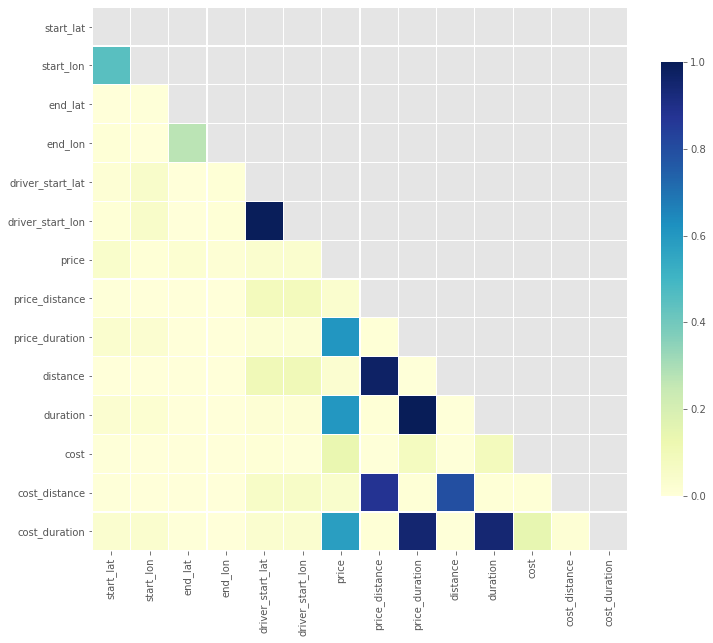

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.select_dtypes('float').corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

That table shows that the variables like 'cost_duration' and 'price_duration' highly correlated.

This information could be important, maybe we don't need to save both columns, and we reduce the information that we save in our
database gettingt the same result.

So, i'm going to delete by the moment the next columns: 

['driver_start_lat','driver_start_lon','price_distance','price_duration','cost_distance','cost_duration']

In [14]:
# Drop the unnecesary columns
df = df.drop(['driver_start_lat','driver_start_lon','price_distance','price_duration','cost_distance','cost_duration'], axis=1)

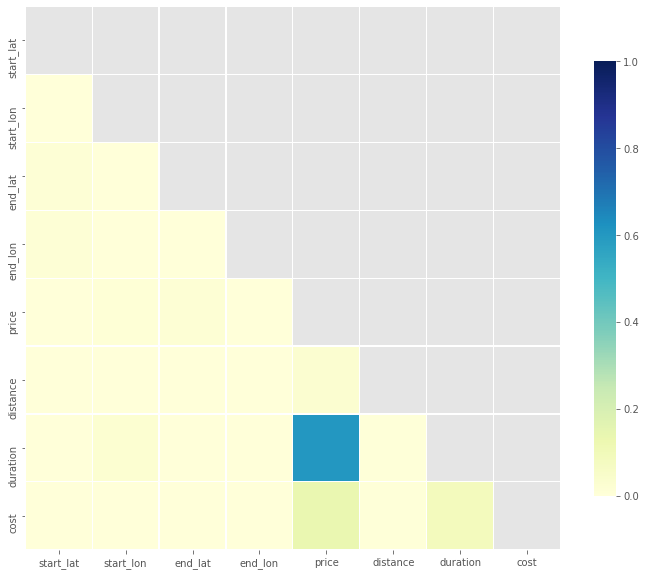

In [15]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.select_dtypes('float')).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [16]:
# Drop the rows which contains null values
df = df.dropna()

In [17]:
df.head(3).T

0  \
journey_id  23a1406fc6a11d866e3c82f22eed4d4c   
user_id     0e9af5bbf1edfe591b54ecdfd7e91e26   
driver_id   583949a89a9ee17d19e3ca4f137b6b4c   
taxi_id     b12f4f09c783e29fe0d0ea624530db56   
icon                               executive   
start_type                              asap   
start_at                 2010-11-16 16:44:52   
start_lat                           -12.1398   
start_lon                           -77.0236   
end_at                   2010-11-16 17:29:57   
end_lat                             -12.0554   
end_lon                             -77.0413   
end_state                           drop off   
arrived_at               2010-11-16 17:02:14   
price                                   3821   
distance                               11331   
duration                                 234   
cost                                       0   
source                                iPhone   

                                           4                                 5  
journey_id  85b7eabcf5d84e42dc7629b7d27781af  2254715f0f569e3173ec61f16cbb8341  
user_id     56772d544fdfa589a020a1ff894a86f7  56772d544fdfa589a020a1ff894a86f7  
driver_id   d665fb9f75ef5d9cd0fd89479380ba78  baacf396f773709519bbde35a5eab861  
taxi_id     0accdd3aa5a322f4129fa20b53278c69  baacf396f773709519bbde35a585d91b  
icon                               executive                         executive  
start_type                          reserved                          reserved  
start_at                 2010-09-11 23:55:00               2010-08-10 13:00:00  
start_lat                             -12.09                          -12.0224  
start_lon                           -76.9263                          -77.1065  
end_at                   2010-09-12 01:07:02               2010-08-10 14:26:51  
end_lat                             -12.0222                          -12.0898  
end_lon                             -77.1064                          -76.9261  
end_state                           drop off                          drop off  
arrived_at               2010-09-11 23:50:00               2010-08-10 12:53:12  
price                                   8227                              8394  
distance                               30270                             29080  
duration                                 715                              1201  
cost                                    6173                              5875  
source                                iPhone                            iPhone

## Ahora vamos a añadir información de geolocalización empleando la latitude y longitud

In [18]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geocoder = Nominatim(user_agent = 'roke23')

In [19]:
location = geocoder.reverse((-12.1398, -77.0413))
# returns geopy Location object

In [20]:
# Example of how it works geopy to get information of the locations
location.raw

{'place_id': 58487892,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 4990723095,
 'lat': '-12.1432962',
 'lon': '-77.0233206',
 'display_name': 'Malecón Sáenz Peña, Barranco, Lima, 15063, Perú',
 'address': {'locality': 'Malecón Sáenz Peña',
  'suburb': 'Barranco',
  'city': 'Barranco',
  'region': 'Lima',
  'state': 'Lima',
  'postcode': '15063',
  'country': 'Perú',
  'country_code': 'pe'},
 'boundingbox': ['-12.1532962', '-12.1332962', '-77.0333206', '-77.0133206']}

In [21]:
# I going to create a subset dataframe to get only the latitude and longitude
df_location = df[['start_lat','start_lon']]

In [22]:
# I drop the ducplicate pairs of latitude and longitud. This is neccesary beacuse i have to reduce the number of calls to the 'api' of
# geopy to avoid problems.

df_location.drop_duplicates(subset =['start_lat','start_lon'],keep = False, inplace = True)

In [23]:
# I create two list to save the unique latitude and the unique longitud
latitude = df_location['start_lat'].to_list()
longitude = df_location['start_lon'].to_list()

In [24]:
# Function that use geopy to get the information about geolocation of each start point.
# I 'm going to search the postcode, neighbourdhood, city, reigon and country to get more information 
# a improve the original dataset.
def location_points(latitude,longitude,attempt=1, max_attempts=5):
    
    main_information = []
    
    for lat, long in zip(latitude,longitude):
        
        dictionary = {}
    
        try:
            location = geocoder.reverse((lat, long))

            if location.raw['address']:

                if 'postcode' in location.raw['address'].keys():      
                    postcode = location.raw['address']['postcode']
                else: 
                    postcode = None

                if 'neighbourhood' in location.raw['address'].keys():
                    neighborhood = location.raw['address']['neighbourhood']
                else: 
                    neighborhood = None

                if 'city' in location.raw['address'].keys():
                    city = location.raw['address']['city']
                else:
                    city = None

                if 'region' in location.raw['address'].keys():
                    region = location.raw['address']['region']
                else:
                    region = None

                if 'country' in location.raw['address'].keys():
                    country = location.raw['address']['country']
                else:
                    country = None



        except GeocoderTimedOut:
                print(GeocoderTimedOut)

                postcode = None, 
                neighborhood  = None
                city = None
                region = None
                country = None
    
        dictionary = {
            'latitude':lat,
            'longitude':long,
            'postcode':postcode,
            'neighborhood':neighborhood,
            'city':city,
            'region':region,
            'country':country
        }
    
        main_information.append(dictionary)
    
    return main_information

In [25]:
# Call the funtion to get the location
location_information = location_points(latitude,longitude)

In [26]:
# Convert to dataframe all the data of the location
df_location = pd.DataFrame(location_information)

In [27]:
# Save a .csv with the location information
df_location.to_csv('Location_cabify.csv', index = False)

In [28]:
# Save the clean dataset as .csv
df.to_excel('Cabify_dataset_processed.xlsx',index = False)